In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')

In [12]:
train

,PID,UID,EF
0,P00001,U00001,61.0
1,P00001,U00002,70.0
2,P00001,U00003,68.0
3,P00001,U00004,69.0
4,P00002,U00007,61.0
...,...,...,...
9801,P03070,U13964,70.0
9802,P03071,U13965,64.0
9803,P03071,U13966,51.0
9804,P03071,U13967,50.0


In [23]:
print('共計',train.shape[0],'筆ECG')
print('共有',len(set(train['PID'])),'位病人')
print('EF小於35共計',sum(train['EF']<35),'佔比',round(sum(train['EF']<35)/len(train['EF'])*100,2),'%')
print('EF大於35共計',sum(train['EF']>=35),'佔比',round(sum(train['EF']>=35)/len(train['EF'])*100,2),'%')

共計 9806 筆ECG
共有 3071 位病人
EF小於35共計 610 佔比 6.22 %
EF大於35共計 9196 佔比 93.78 %


In [24]:
data_u00001 = pd.read_csv('ecg/U00001.csv')

In [25]:
data_u00001

,leadI,leadII,leadIII,leadaVR,leadaVL,leadaVF,leadV1,leadV2,leadV3,leadV4,leadV5,leadV6
0,4,7,3,-6,0,5,-4,-4,-5,-3,7,8
1,30,56,23,-43,2,40,-43,-66,-57,-26,31,54
2,-10,-9,-1,9,-5,-4,-31,-62,-73,-60,-34,-14
3,-23,-37,-14,29,-6,-25,5,-11,-49,-65,-67,-70
4,-20,-36,-17,28,-2,-26,19,19,-28,-50,-55,-67
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-5,-5,-6,-11,-9,-5,-11,6,-27,-36,-10,-11
996,-5,-5,-6,-12,-9,-6,-11,6,-28,-37,-11,-11
997,-5,-4,-7,-12,-9,-5,-11,7,-28,-37,-11,-9
998,-5,-4,-6,-13,-9,-5,-11,7,-28,-37,-11,-9


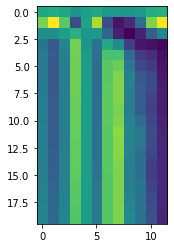

In [37]:
plt.imshow(np.array(data_u00001.head(20)))

In [162]:
x_train = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data_u00001))
x_train = preprocessing.StandardScaler().fit_transform(data_u00001)

In [163]:
x_train

array([[ 0.70982719,  0.62934792,  0.62824667, ..., -0.05936751,
         0.49152309,  0.48626878],
       [ 4.10238362,  4.02747991,  3.47099181, ..., -1.1056915 ,
         1.78727817,  2.57931302],
       [-1.11693396, -0.48024621,  0.05969765, ..., -2.65243131,
        -1.7220585 , -0.51475238],
       ...,
       [-0.46451926, -0.13349804, -0.79312589, ..., -1.60610732,
        -0.48029321, -0.28724757],
       [-0.46451926, -0.13349804, -0.65098864, ..., -1.60610732,
        -0.48029321, -0.28724757],
       [-0.46451926, -0.13349804, -0.65098864, ..., -1.51512263,
        -0.42630342, -0.19624565]])

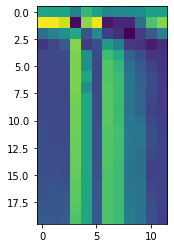

In [78]:
plt.imshow(np.array(x_train.head(20)))

In [110]:
np.array(x_train).shape

(1000, 12)

In [111]:
np.array(x_train).reshape(1,12000)

array([[ 0.70982719,  0.62934792,  0.62824667, ..., -1.51512263,
        -0.42630342, -0.19624565]])

In [112]:
a = np.array(x_train).reshape(1,12000)

In [159]:
pd.DataFrame(a).append(pd.DataFrame(a), ignore_index=True)

C:\Users\LEE\AppData\Local\Temp\ipykernel_11564\2723657113.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.DataFrame(a).append(pd.DataFrame(a), ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,0.709827,0.629348,0.628247,-0.596852,1.360541,0.608684,-0.390321,-0.218389,-0.25378,-0.059368,...,-0.650989,-1.317252,-4.780316,-0.326746,-1.059538,0.419744,-1.578247,-1.515123,-0.426303,-0.196246
1,0.709827,0.629348,0.628247,-0.596852,1.360541,0.608684,-0.390321,-0.218389,-0.25378,-0.059368,...,-0.650989,-1.317252,-4.780316,-0.326746,-1.059538,0.419744,-1.578247,-1.515123,-0.426303,-0.196246


In [113]:
x = np.vstack([a,a])

In [114]:
x = np.vstack([x,a])
x

array([[ 0.70982719,  0.62934792,  0.62824667, ..., -1.51512263,
        -0.42630342, -0.19624565],
       [ 0.70982719,  0.62934792,  0.62824667, ..., -1.51512263,
        -0.42630342, -0.19624565],
       [ 0.70982719,  0.62934792,  0.62824667, ..., -1.51512263,
        -0.42630342, -0.19624565]])

In [106]:
a.reshape(1,6)

ValueError: cannot reshape array of size 12000 into shape (1,6)

In [70]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(data_u00001))

In [71]:
train_set_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.709827,0.629348,0.628247,-0.596852,1.360541,0.608684,-0.390321,-0.218389,-0.253780,-0.059368,0.491523,0.486269
1,4.102384,4.027480,3.470992,-3.928703,2.725176,3.882688,-3.652755,-3.261793,-3.248229,-1.105692,1.787278,2.579313
2,-1.116934,-0.480246,0.059698,0.753899,-2.051046,-0.233203,-2.648929,-3.065444,-4.169598,-2.652431,-1.722058,-0.514752
3,-2.813212,-2.422036,-1.788087,2.554900,-2.733364,-2.197605,0.362548,-0.561999,-2.787544,-2.879893,-3.503722,-3.062806
4,-2.421763,-2.352686,-2.214498,2.464850,-0.004094,-2.291148,1.533679,0.910616,-1.578247,-2.197508,-2.855844,-2.926303
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.464519,-0.202848,-0.650989,-1.047102,-4.780316,-0.326746,-0.975886,0.272483,-1.520662,-1.560615,-0.426303,-0.378249
996,-0.464519,-0.202848,-0.650989,-1.137152,-4.780316,-0.420289,-0.975886,0.272483,-1.578247,-1.606107,-0.480293,-0.378249
997,-0.464519,-0.133498,-0.793126,-1.137152,-4.780316,-0.326746,-0.975886,0.321570,-1.578247,-1.606107,-0.480293,-0.287248
998,-0.464519,-0.133498,-0.650989,-1.227202,-4.780316,-0.326746,-0.975886,0.321570,-1.578247,-1.606107,-0.480293,-0.287248


In [128]:
y = []

In [127]:
for i in range(train.shape[0]):
    if train['EF'][i] >= 35:
        y[i] = 0
    else:
        y[i] = 1

IndexError: list assignment index out of range

In [145]:
train['y'] = (train['EF'] < 35)*1

In [146]:
train

,PID,UID,EF,y
0,P00001,U00001,61.0,0
1,P00001,U00002,70.0,0
2,P00001,U00003,68.0,0
3,P00001,U00004,69.0,0
4,P00002,U00007,61.0,0
...,...,...,...,...
9801,P03070,U13964,70.0,0
9802,P03071,U13965,64.0,0
9803,P03071,U13966,51.0,0
9804,P03071,U13967,50.0,0


In [189]:
x_train = pd.DataFrame()

In [190]:
for uid in train['UID']:
    print('處理','ecg/{}.csv'.format(uid))
    ecg = pd.read_csv('ecg/{}.csv'.format(uid))
    ecg_scaled = preprocessing.StandardScaler().fit_transform(ecg)
    ecg_vec = ecg_scaled.reshape(1,12000)
    x_train = pd.concat([x_train, pd.DataFrame(ecg_vec)], ignore_index=True, sort=False)
    

處理 ecg/U00001.csv
處理 ecg/U00002.csv
處理 ecg/U00003.csv
處理 ecg/U00004.csv
處理 ecg/U00007.csv
處理 ecg/U00008.csv
處理 ecg/U00011.csv
處理 ecg/U00012.csv
處理 ecg/U00013.csv
處理 ecg/U00014.csv
處理 ecg/U00015.csv
處理 ecg/U00016.csv
處理 ecg/U00017.csv
處理 ecg/U00018.csv
處理 ecg/U00019.csv
處理 ecg/U00020.csv
處理 ecg/U00021.csv
處理 ecg/U00022.csv
處理 ecg/U00023.csv
處理 ecg/U00026.csv
處理 ecg/U00027.csv
處理 ecg/U00030.csv
處理 ecg/U00031.csv
處理 ecg/U00034.csv
處理 ecg/U00035.csv
處理 ecg/U00038.csv
處理 ecg/U00039.csv
處理 ecg/U00040.csv
處理 ecg/U00043.csv
處理 ecg/U00044.csv
處理 ecg/U00045.csv
處理 ecg/U00048.csv
處理 ecg/U00049.csv
處理 ecg/U00052.csv
處理 ecg/U00053.csv
處理 ecg/U00054.csv
處理 ecg/U00055.csv
處理 ecg/U00056.csv
處理 ecg/U00057.csv
處理 ecg/U00058.csv
處理 ecg/U00059.csv
處理 ecg/U00060.csv
處理 ecg/U00061.csv
處理 ecg/U00064.csv
處理 ecg/U00065.csv
處理 ecg/U00068.csv
處理 ecg/U00069.csv
處理 ecg/U00072.csv
處理 ecg/U00073.csv
處理 ecg/U00076.csv
處理 ecg/U00077.csv
處理 ecg/U00080.csv
處理 ecg/U00081.csv
處理 ecg/U00082.csv
處理 ecg/U00085.csv
處理 ecg/U00

處理 ecg/U00749.csv
處理 ecg/U00750.csv
處理 ecg/U00751.csv
處理 ecg/U00754.csv
處理 ecg/U00755.csv
處理 ecg/U00756.csv
處理 ecg/U00757.csv
處理 ecg/U00760.csv
處理 ecg/U00761.csv
處理 ecg/U00762.csv
處理 ecg/U00763.csv
處理 ecg/U00766.csv
處理 ecg/U00767.csv
處理 ecg/U00770.csv
處理 ecg/U00771.csv
處理 ecg/U00772.csv
處理 ecg/U00773.csv
處理 ecg/U00774.csv
處理 ecg/U00775.csv
處理 ecg/U00776.csv
處理 ecg/U00779.csv
處理 ecg/U00780.csv
處理 ecg/U00783.csv
處理 ecg/U00784.csv
處理 ecg/U00785.csv
處理 ecg/U00788.csv
處理 ecg/U00789.csv
處理 ecg/U00792.csv
處理 ecg/U00793.csv
處理 ecg/U00794.csv
處理 ecg/U00795.csv
處理 ecg/U00796.csv
處理 ecg/U00797.csv
處理 ecg/U00798.csv
處理 ecg/U00799.csv
處理 ecg/U00800.csv
處理 ecg/U00801.csv
處理 ecg/U00802.csv
處理 ecg/U00805.csv
處理 ecg/U00806.csv
處理 ecg/U00807.csv
處理 ecg/U00808.csv
處理 ecg/U00811.csv
處理 ecg/U00812.csv
處理 ecg/U00813.csv
處理 ecg/U00816.csv
處理 ecg/U00817.csv
處理 ecg/U00820.csv
處理 ecg/U00821.csv
處理 ecg/U00822.csv
處理 ecg/U00823.csv
處理 ecg/U00824.csv
處理 ecg/U00825.csv
處理 ecg/U00828.csv
處理 ecg/U00829.csv
處理 ecg/U00

處理 ecg/U01469.csv
處理 ecg/U01470.csv
處理 ecg/U01471.csv
處理 ecg/U01474.csv
處理 ecg/U01475.csv
處理 ecg/U01476.csv
處理 ecg/U01477.csv
處理 ecg/U01480.csv
處理 ecg/U01481.csv
處理 ecg/U01484.csv
處理 ecg/U01485.csv
處理 ecg/U01486.csv
處理 ecg/U01487.csv
處理 ecg/U01490.csv
處理 ecg/U01491.csv
處理 ecg/U01492.csv
處理 ecg/U01493.csv
處理 ecg/U01494.csv
處理 ecg/U01495.csv
處理 ecg/U01496.csv
處理 ecg/U01499.csv
處理 ecg/U01500.csv
處理 ecg/U01503.csv
處理 ecg/U01504.csv
處理 ecg/U01507.csv
處理 ecg/U01508.csv
處理 ecg/U01509.csv
處理 ecg/U01510.csv
處理 ecg/U01513.csv
處理 ecg/U01514.csv
處理 ecg/U01517.csv
處理 ecg/U01518.csv
處理 ecg/U01521.csv
處理 ecg/U01522.csv
處理 ecg/U01523.csv
處理 ecg/U01524.csv
處理 ecg/U01525.csv
處理 ecg/U01526.csv
處理 ecg/U01527.csv
處理 ecg/U01528.csv
處理 ecg/U01531.csv
處理 ecg/U01532.csv
處理 ecg/U01535.csv
處理 ecg/U01536.csv
處理 ecg/U01539.csv
處理 ecg/U01540.csv
處理 ecg/U01541.csv
處理 ecg/U01542.csv
處理 ecg/U01543.csv
處理 ecg/U01544.csv
處理 ecg/U01545.csv
處理 ecg/U01546.csv
處理 ecg/U01549.csv
處理 ecg/U01550.csv
處理 ecg/U01551.csv
處理 ecg/U01

處理 ecg/U02206.csv
處理 ecg/U02207.csv
處理 ecg/U02208.csv
處理 ecg/U02209.csv
處理 ecg/U02212.csv
處理 ecg/U02213.csv
處理 ecg/U02216.csv
處理 ecg/U02217.csv
處理 ecg/U02220.csv
處理 ecg/U02221.csv
處理 ecg/U02222.csv
處理 ecg/U02225.csv
處理 ecg/U02226.csv
處理 ecg/U02227.csv
處理 ecg/U02230.csv
處理 ecg/U02231.csv
處理 ecg/U02234.csv
處理 ecg/U02235.csv
處理 ecg/U02238.csv
處理 ecg/U02239.csv
處理 ecg/U02242.csv
處理 ecg/U02243.csv
處理 ecg/U02246.csv
處理 ecg/U02247.csv
處理 ecg/U02248.csv
處理 ecg/U02251.csv
處理 ecg/U02252.csv
處理 ecg/U02255.csv
處理 ecg/U02256.csv
處理 ecg/U02257.csv
處理 ecg/U02258.csv
處理 ecg/U02259.csv
處理 ecg/U02260.csv
處理 ecg/U02261.csv
處理 ecg/U02262.csv
處理 ecg/U02263.csv
處理 ecg/U02264.csv
處理 ecg/U02267.csv
處理 ecg/U02268.csv
處理 ecg/U02269.csv
處理 ecg/U02272.csv
處理 ecg/U02273.csv
處理 ecg/U02274.csv
處理 ecg/U02277.csv
處理 ecg/U02278.csv
處理 ecg/U02281.csv
處理 ecg/U02282.csv
處理 ecg/U02283.csv
處理 ecg/U02286.csv
處理 ecg/U02287.csv
處理 ecg/U02290.csv
處理 ecg/U02291.csv
處理 ecg/U02294.csv
處理 ecg/U02295.csv
處理 ecg/U02296.csv
處理 ecg/U02

處理 ecg/U02939.csv
處理 ecg/U02940.csv
處理 ecg/U02943.csv
處理 ecg/U02944.csv
處理 ecg/U02945.csv
處理 ecg/U02948.csv
處理 ecg/U02949.csv
處理 ecg/U02952.csv
處理 ecg/U02953.csv
處理 ecg/U02954.csv
處理 ecg/U02955.csv
處理 ecg/U02956.csv
處理 ecg/U02957.csv
處理 ecg/U02958.csv
處理 ecg/U02961.csv
處理 ecg/U02962.csv
處理 ecg/U02963.csv
處理 ecg/U02964.csv
處理 ecg/U02965.csv
處理 ecg/U02966.csv
處理 ecg/U02967.csv
處理 ecg/U02968.csv
處理 ecg/U02969.csv
處理 ecg/U02970.csv
處理 ecg/U02973.csv
處理 ecg/U02974.csv
處理 ecg/U02977.csv
處理 ecg/U02978.csv
處理 ecg/U02979.csv
處理 ecg/U02980.csv
處理 ecg/U02981.csv
處理 ecg/U02982.csv
處理 ecg/U02983.csv
處理 ecg/U02984.csv
處理 ecg/U02985.csv
處理 ecg/U02986.csv
處理 ecg/U02987.csv
處理 ecg/U02988.csv
處理 ecg/U02991.csv
處理 ecg/U02992.csv
處理 ecg/U02993.csv
處理 ecg/U02994.csv
處理 ecg/U02997.csv
處理 ecg/U02998.csv
處理 ecg/U03001.csv
處理 ecg/U03002.csv
處理 ecg/U03005.csv
處理 ecg/U03006.csv
處理 ecg/U03007.csv
處理 ecg/U03008.csv
處理 ecg/U03009.csv
處理 ecg/U03010.csv
處理 ecg/U03011.csv
處理 ecg/U03012.csv
處理 ecg/U03013.csv
處理 ecg/U03

處理 ecg/U03541.csv
處理 ecg/U03542.csv
處理 ecg/U03543.csv
處理 ecg/U03544.csv
處理 ecg/U03545.csv
處理 ecg/U03546.csv
處理 ecg/U03547.csv
處理 ecg/U03550.csv
處理 ecg/U03551.csv
處理 ecg/U03554.csv
處理 ecg/U03555.csv
處理 ecg/U03556.csv
處理 ecg/U03557.csv
處理 ecg/U03558.csv
處理 ecg/U03559.csv
處理 ecg/U03562.csv
處理 ecg/U03563.csv
處理 ecg/U03564.csv
處理 ecg/U03565.csv
處理 ecg/U03566.csv
處理 ecg/U03567.csv
處理 ecg/U03568.csv
處理 ecg/U03569.csv
處理 ecg/U03570.csv
處理 ecg/U03571.csv
處理 ecg/U03574.csv
處理 ecg/U03575.csv
處理 ecg/U03576.csv
處理 ecg/U03579.csv
處理 ecg/U03580.csv
處理 ecg/U03583.csv
處理 ecg/U03584.csv
處理 ecg/U03587.csv
處理 ecg/U03588.csv
處理 ecg/U03591.csv
處理 ecg/U03592.csv
處理 ecg/U03593.csv
處理 ecg/U03596.csv
處理 ecg/U03597.csv
處理 ecg/U03598.csv
處理 ecg/U03601.csv
處理 ecg/U03602.csv
處理 ecg/U03605.csv
處理 ecg/U03606.csv
處理 ecg/U03609.csv
處理 ecg/U03610.csv
處理 ecg/U03611.csv
處理 ecg/U03612.csv
處理 ecg/U03613.csv
處理 ecg/U03614.csv
處理 ecg/U03615.csv
處理 ecg/U03616.csv
處理 ecg/U03619.csv
處理 ecg/U03620.csv
處理 ecg/U03621.csv
處理 ecg/U03

處理 ecg/U04145.csv
處理 ecg/U04146.csv
處理 ecg/U04147.csv
處理 ecg/U04148.csv
處理 ecg/U04149.csv
處理 ecg/U04150.csv
處理 ecg/U04153.csv
處理 ecg/U04154.csv
處理 ecg/U04155.csv
處理 ecg/U04156.csv
處理 ecg/U04157.csv
處理 ecg/U04158.csv
處理 ecg/U04159.csv
處理 ecg/U04160.csv
處理 ecg/U04161.csv
處理 ecg/U04162.csv
處理 ecg/U04163.csv
處理 ecg/U04164.csv
處理 ecg/U04167.csv
處理 ecg/U04168.csv
處理 ecg/U04171.csv
處理 ecg/U04172.csv
處理 ecg/U04173.csv
處理 ecg/U04174.csv
處理 ecg/U04175.csv
處理 ecg/U04176.csv
處理 ecg/U04177.csv
處理 ecg/U04178.csv
處理 ecg/U04179.csv
處理 ecg/U04180.csv
處理 ecg/U04181.csv
處理 ecg/U04182.csv
處理 ecg/U04183.csv
處理 ecg/U04186.csv
處理 ecg/U04187.csv
處理 ecg/U04188.csv
處理 ecg/U04189.csv
處理 ecg/U04190.csv
處理 ecg/U04191.csv
處理 ecg/U04192.csv
處理 ecg/U04193.csv
處理 ecg/U04194.csv
處理 ecg/U04195.csv
處理 ecg/U04196.csv
處理 ecg/U04197.csv
處理 ecg/U04198.csv
處理 ecg/U04199.csv
處理 ecg/U04200.csv
處理 ecg/U04201.csv
處理 ecg/U04202.csv
處理 ecg/U04203.csv
處理 ecg/U04204.csv
處理 ecg/U04205.csv
處理 ecg/U04206.csv
處理 ecg/U04207.csv
處理 ecg/U04

處理 ecg/U04756.csv
處理 ecg/U04757.csv
處理 ecg/U04758.csv
處理 ecg/U04759.csv
處理 ecg/U04760.csv
處理 ecg/U04761.csv
處理 ecg/U04762.csv
處理 ecg/U04765.csv
處理 ecg/U04766.csv
處理 ecg/U04767.csv
處理 ecg/U04768.csv
處理 ecg/U04769.csv
處理 ecg/U04770.csv
處理 ecg/U04771.csv
處理 ecg/U04774.csv
處理 ecg/U04775.csv
處理 ecg/U04776.csv
處理 ecg/U04777.csv
處理 ecg/U04778.csv
處理 ecg/U04779.csv
處理 ecg/U04780.csv
處理 ecg/U04781.csv
處理 ecg/U04782.csv
處理 ecg/U04783.csv
處理 ecg/U04784.csv
處理 ecg/U04785.csv
處理 ecg/U04786.csv
處理 ecg/U04787.csv
處理 ecg/U04788.csv
處理 ecg/U04789.csv
處理 ecg/U04792.csv
處理 ecg/U04793.csv
處理 ecg/U04796.csv
處理 ecg/U04797.csv
處理 ecg/U04798.csv
處理 ecg/U04799.csv
處理 ecg/U04802.csv
處理 ecg/U04803.csv
處理 ecg/U04804.csv
處理 ecg/U04805.csv
處理 ecg/U04806.csv
處理 ecg/U04807.csv
處理 ecg/U04808.csv
處理 ecg/U04811.csv
處理 ecg/U04812.csv
處理 ecg/U04815.csv
處理 ecg/U04816.csv
處理 ecg/U04819.csv
處理 ecg/U04820.csv
處理 ecg/U04821.csv
處理 ecg/U04824.csv
處理 ecg/U04825.csv
處理 ecg/U04828.csv
處理 ecg/U04829.csv
處理 ecg/U04832.csv
處理 ecg/U04

處理 ecg/U05406.csv
處理 ecg/U05407.csv
處理 ecg/U05410.csv
處理 ecg/U05411.csv
處理 ecg/U05412.csv
處理 ecg/U05415.csv
處理 ecg/U05416.csv
處理 ecg/U05417.csv
處理 ecg/U05418.csv
處理 ecg/U05419.csv
處理 ecg/U05420.csv
處理 ecg/U05421.csv
處理 ecg/U05422.csv
處理 ecg/U05423.csv
處理 ecg/U05424.csv
處理 ecg/U05425.csv
處理 ecg/U05426.csv
處理 ecg/U05429.csv
處理 ecg/U05430.csv
處理 ecg/U05431.csv
處理 ecg/U05434.csv
處理 ecg/U05435.csv
處理 ecg/U05438.csv
處理 ecg/U05439.csv
處理 ecg/U05440.csv
處理 ecg/U05441.csv
處理 ecg/U05444.csv
處理 ecg/U05445.csv
處理 ecg/U05448.csv
處理 ecg/U05449.csv
處理 ecg/U05452.csv
處理 ecg/U05453.csv
處理 ecg/U05454.csv
處理 ecg/U05455.csv
處理 ecg/U05456.csv
處理 ecg/U05457.csv
處理 ecg/U05458.csv
處理 ecg/U05459.csv
處理 ecg/U05460.csv
處理 ecg/U05461.csv
處理 ecg/U05462.csv
處理 ecg/U05463.csv
處理 ecg/U05464.csv
處理 ecg/U05465.csv
處理 ecg/U05466.csv
處理 ecg/U05467.csv
處理 ecg/U05468.csv
處理 ecg/U05469.csv
處理 ecg/U05470.csv
處理 ecg/U05473.csv
處理 ecg/U05474.csv
處理 ecg/U05477.csv
處理 ecg/U05478.csv
處理 ecg/U05479.csv
處理 ecg/U05480.csv
處理 ecg/U05

處理 ecg/U06022.csv
處理 ecg/U06023.csv
處理 ecg/U06024.csv
處理 ecg/U06025.csv
處理 ecg/U06026.csv
處理 ecg/U06027.csv
處理 ecg/U06028.csv
處理 ecg/U06029.csv
處理 ecg/U06032.csv
處理 ecg/U06033.csv
處理 ecg/U06036.csv
處理 ecg/U06037.csv
處理 ecg/U06038.csv
處理 ecg/U06041.csv
處理 ecg/U06042.csv
處理 ecg/U06043.csv
處理 ecg/U06044.csv
處理 ecg/U06045.csv
處理 ecg/U06046.csv
處理 ecg/U06049.csv
處理 ecg/U06050.csv
處理 ecg/U06051.csv
處理 ecg/U06052.csv
處理 ecg/U06053.csv
處理 ecg/U06054.csv
處理 ecg/U06055.csv
處理 ecg/U06056.csv
處理 ecg/U06057.csv
處理 ecg/U06058.csv
處理 ecg/U06061.csv
處理 ecg/U06062.csv
處理 ecg/U06063.csv
處理 ecg/U06066.csv
處理 ecg/U06067.csv
處理 ecg/U06068.csv
處理 ecg/U06071.csv
處理 ecg/U06072.csv
處理 ecg/U06075.csv
處理 ecg/U06076.csv
處理 ecg/U06077.csv
處理 ecg/U06078.csv
處理 ecg/U06079.csv
處理 ecg/U06080.csv
處理 ecg/U06083.csv
處理 ecg/U06084.csv
處理 ecg/U06085.csv
處理 ecg/U06088.csv
處理 ecg/U06089.csv
處理 ecg/U06090.csv
處理 ecg/U06091.csv
處理 ecg/U06092.csv
處理 ecg/U06093.csv
處理 ecg/U06094.csv
處理 ecg/U06097.csv
處理 ecg/U06098.csv
處理 ecg/U06

處理 ecg/U06656.csv
處理 ecg/U06659.csv
處理 ecg/U06660.csv
處理 ecg/U06661.csv
處理 ecg/U06662.csv
處理 ecg/U06663.csv
處理 ecg/U06664.csv
處理 ecg/U06667.csv
處理 ecg/U06668.csv
處理 ecg/U06669.csv
處理 ecg/U06670.csv
處理 ecg/U06671.csv
處理 ecg/U06672.csv
處理 ecg/U06673.csv
處理 ecg/U06674.csv
處理 ecg/U06675.csv
處理 ecg/U06676.csv
處理 ecg/U06677.csv
處理 ecg/U06678.csv
處理 ecg/U06681.csv
處理 ecg/U06682.csv
處理 ecg/U06683.csv
處理 ecg/U06686.csv
處理 ecg/U06687.csv
處理 ecg/U06690.csv
處理 ecg/U06691.csv
處理 ecg/U06692.csv
處理 ecg/U06693.csv
處理 ecg/U06694.csv
處理 ecg/U06695.csv
處理 ecg/U06696.csv
處理 ecg/U06697.csv
處理 ecg/U06700.csv
處理 ecg/U06701.csv
處理 ecg/U06704.csv
處理 ecg/U06705.csv
處理 ecg/U06706.csv
處理 ecg/U06707.csv
處理 ecg/U06708.csv
處理 ecg/U06709.csv
處理 ecg/U06710.csv
處理 ecg/U06711.csv
處理 ecg/U06714.csv
處理 ecg/U06715.csv
處理 ecg/U06716.csv
處理 ecg/U06719.csv
處理 ecg/U06720.csv
處理 ecg/U06721.csv
處理 ecg/U06724.csv
處理 ecg/U06725.csv
處理 ecg/U06726.csv
處理 ecg/U06729.csv
處理 ecg/U06730.csv
處理 ecg/U06733.csv
處理 ecg/U06734.csv
處理 ecg/U06

處理 ecg/U07281.csv
處理 ecg/U07282.csv
處理 ecg/U07283.csv
處理 ecg/U07284.csv
處理 ecg/U07287.csv
處理 ecg/U07288.csv
處理 ecg/U07291.csv
處理 ecg/U07292.csv
處理 ecg/U07295.csv
處理 ecg/U07296.csv
處理 ecg/U07299.csv
處理 ecg/U07300.csv
處理 ecg/U07303.csv
處理 ecg/U07304.csv
處理 ecg/U07307.csv
處理 ecg/U07308.csv
處理 ecg/U07311.csv
處理 ecg/U07312.csv
處理 ecg/U07313.csv
處理 ecg/U07314.csv
處理 ecg/U07315.csv
處理 ecg/U07316.csv
處理 ecg/U07317.csv
處理 ecg/U07320.csv
處理 ecg/U07321.csv
處理 ecg/U07324.csv
處理 ecg/U07325.csv
處理 ecg/U07326.csv
處理 ecg/U07327.csv
處理 ecg/U07328.csv
處理 ecg/U07329.csv
處理 ecg/U07330.csv
處理 ecg/U07333.csv
處理 ecg/U07334.csv
處理 ecg/U07335.csv
處理 ecg/U07336.csv
處理 ecg/U07337.csv
處理 ecg/U07338.csv
處理 ecg/U07339.csv
處理 ecg/U07340.csv
處理 ecg/U07343.csv
處理 ecg/U07344.csv
處理 ecg/U07345.csv
處理 ecg/U07346.csv
處理 ecg/U07349.csv
處理 ecg/U07350.csv
處理 ecg/U07351.csv
處理 ecg/U07352.csv
處理 ecg/U07353.csv
處理 ecg/U07354.csv
處理 ecg/U07355.csv
處理 ecg/U07356.csv
處理 ecg/U07357.csv
處理 ecg/U07358.csv
處理 ecg/U07359.csv
處理 ecg/U07

處理 ecg/U07918.csv
處理 ecg/U07919.csv
處理 ecg/U07920.csv
處理 ecg/U07923.csv
處理 ecg/U07924.csv
處理 ecg/U07925.csv
處理 ecg/U07926.csv
處理 ecg/U07927.csv
處理 ecg/U07928.csv
處理 ecg/U07931.csv
處理 ecg/U07932.csv
處理 ecg/U07933.csv
處理 ecg/U07934.csv
處理 ecg/U07937.csv
處理 ecg/U07938.csv
處理 ecg/U07939.csv
處理 ecg/U07940.csv
處理 ecg/U07941.csv
處理 ecg/U07942.csv
處理 ecg/U07943.csv
處理 ecg/U07944.csv
處理 ecg/U07945.csv
處理 ecg/U07946.csv
處理 ecg/U07947.csv
處理 ecg/U07950.csv
處理 ecg/U07951.csv
處理 ecg/U07954.csv
處理 ecg/U07955.csv
處理 ecg/U07956.csv
處理 ecg/U07957.csv
處理 ecg/U07958.csv
處理 ecg/U07959.csv
處理 ecg/U07960.csv
處理 ecg/U07961.csv
處理 ecg/U07964.csv
處理 ecg/U07965.csv
處理 ecg/U07966.csv
處理 ecg/U07967.csv
處理 ecg/U07968.csv
處理 ecg/U07969.csv
處理 ecg/U07970.csv
處理 ecg/U07971.csv
處理 ecg/U07972.csv
處理 ecg/U07973.csv
處理 ecg/U07974.csv
處理 ecg/U07975.csv
處理 ecg/U07976.csv
處理 ecg/U07979.csv
處理 ecg/U07980.csv
處理 ecg/U07981.csv
處理 ecg/U07984.csv
處理 ecg/U07985.csv
處理 ecg/U07986.csv
處理 ecg/U07987.csv
處理 ecg/U07988.csv
處理 ecg/U07

處理 ecg/U08516.csv
處理 ecg/U08517.csv
處理 ecg/U08518.csv
處理 ecg/U08519.csv
處理 ecg/U08522.csv
處理 ecg/U08523.csv
處理 ecg/U08524.csv
處理 ecg/U08525.csv
處理 ecg/U08526.csv
處理 ecg/U08527.csv
處理 ecg/U08528.csv
處理 ecg/U08529.csv
處理 ecg/U08532.csv
處理 ecg/U08533.csv
處理 ecg/U08536.csv
處理 ecg/U08537.csv
處理 ecg/U08540.csv
處理 ecg/U08541.csv
處理 ecg/U08544.csv
處理 ecg/U08545.csv
處理 ecg/U08548.csv
處理 ecg/U08549.csv
處理 ecg/U08552.csv
處理 ecg/U08553.csv
處理 ecg/U08554.csv
處理 ecg/U08557.csv
處理 ecg/U08558.csv
處理 ecg/U08559.csv
處理 ecg/U08560.csv
處理 ecg/U08561.csv
處理 ecg/U08562.csv
處理 ecg/U08563.csv
處理 ecg/U08564.csv
處理 ecg/U08565.csv
處理 ecg/U08568.csv
處理 ecg/U08569.csv
處理 ecg/U08570.csv
處理 ecg/U08571.csv
處理 ecg/U08572.csv
處理 ecg/U08573.csv
處理 ecg/U08574.csv
處理 ecg/U08575.csv
處理 ecg/U08576.csv
處理 ecg/U08577.csv
處理 ecg/U08578.csv
處理 ecg/U08579.csv
處理 ecg/U08580.csv
處理 ecg/U08581.csv
處理 ecg/U08582.csv
處理 ecg/U08583.csv
處理 ecg/U08584.csv
處理 ecg/U08585.csv
處理 ecg/U08586.csv
處理 ecg/U08587.csv
處理 ecg/U08588.csv
處理 ecg/U08

處理 ecg/U09162.csv
處理 ecg/U09163.csv
處理 ecg/U09164.csv
處理 ecg/U09165.csv
處理 ecg/U09166.csv
處理 ecg/U09167.csv
處理 ecg/U09168.csv
處理 ecg/U09169.csv
處理 ecg/U09170.csv
處理 ecg/U09171.csv
處理 ecg/U09172.csv
處理 ecg/U09173.csv
處理 ecg/U09174.csv
處理 ecg/U09175.csv
處理 ecg/U09176.csv
處理 ecg/U09177.csv
處理 ecg/U09178.csv
處理 ecg/U09179.csv
處理 ecg/U09182.csv
處理 ecg/U09183.csv
處理 ecg/U09184.csv
處理 ecg/U09185.csv
處理 ecg/U09186.csv
處理 ecg/U09187.csv
處理 ecg/U09188.csv
處理 ecg/U09189.csv
處理 ecg/U09190.csv
處理 ecg/U09191.csv
處理 ecg/U09192.csv
處理 ecg/U09193.csv
處理 ecg/U09194.csv
處理 ecg/U09195.csv
處理 ecg/U09198.csv
處理 ecg/U09199.csv
處理 ecg/U09202.csv
處理 ecg/U09203.csv
處理 ecg/U09206.csv
處理 ecg/U09207.csv
處理 ecg/U09208.csv
處理 ecg/U09211.csv
處理 ecg/U09212.csv
處理 ecg/U09213.csv
處理 ecg/U09214.csv
處理 ecg/U09215.csv
處理 ecg/U09216.csv
處理 ecg/U09217.csv
處理 ecg/U09220.csv
處理 ecg/U09221.csv
處理 ecg/U09222.csv
處理 ecg/U09223.csv
處理 ecg/U09226.csv
處理 ecg/U09227.csv
處理 ecg/U09230.csv
處理 ecg/U09231.csv
處理 ecg/U09234.csv
處理 ecg/U09

處理 ecg/U09783.csv
處理 ecg/U09784.csv
處理 ecg/U09787.csv
處理 ecg/U09788.csv
處理 ecg/U09789.csv
處理 ecg/U09790.csv
處理 ecg/U09791.csv
處理 ecg/U09792.csv
處理 ecg/U09793.csv
處理 ecg/U09794.csv
處理 ecg/U09795.csv
處理 ecg/U09796.csv
處理 ecg/U09797.csv
處理 ecg/U09800.csv
處理 ecg/U09801.csv
處理 ecg/U09802.csv
處理 ecg/U09805.csv
處理 ecg/U09806.csv
處理 ecg/U09809.csv
處理 ecg/U09810.csv
處理 ecg/U09811.csv
處理 ecg/U09812.csv
處理 ecg/U09813.csv
處理 ecg/U09814.csv
處理 ecg/U09815.csv
處理 ecg/U09818.csv
處理 ecg/U09819.csv
處理 ecg/U09822.csv
處理 ecg/U09823.csv
處理 ecg/U09824.csv
處理 ecg/U09827.csv
處理 ecg/U09828.csv
處理 ecg/U09829.csv
處理 ecg/U09830.csv
處理 ecg/U09833.csv
處理 ecg/U09834.csv
處理 ecg/U09835.csv
處理 ecg/U09836.csv
處理 ecg/U09837.csv
處理 ecg/U09838.csv
處理 ecg/U09839.csv
處理 ecg/U09840.csv
處理 ecg/U09841.csv
處理 ecg/U09842.csv
處理 ecg/U09845.csv
處理 ecg/U09846.csv
處理 ecg/U09849.csv
處理 ecg/U09850.csv
處理 ecg/U09851.csv
處理 ecg/U09852.csv
處理 ecg/U09853.csv
處理 ecg/U09854.csv
處理 ecg/U09857.csv
處理 ecg/U09858.csv
處理 ecg/U09859.csv
處理 ecg/U09

處理 ecg/U10417.csv
處理 ecg/U10418.csv
處理 ecg/U10419.csv
處理 ecg/U10422.csv
處理 ecg/U10423.csv
處理 ecg/U10424.csv
處理 ecg/U10427.csv
處理 ecg/U10428.csv
處理 ecg/U10429.csv
處理 ecg/U10430.csv
處理 ecg/U10431.csv
處理 ecg/U10432.csv
處理 ecg/U10433.csv
處理 ecg/U10434.csv
處理 ecg/U10437.csv
處理 ecg/U10438.csv
處理 ecg/U10441.csv
處理 ecg/U10442.csv
處理 ecg/U10445.csv
處理 ecg/U10446.csv
處理 ecg/U10449.csv
處理 ecg/U10450.csv
處理 ecg/U10451.csv
處理 ecg/U10452.csv
處理 ecg/U10453.csv
處理 ecg/U10454.csv
處理 ecg/U10455.csv
處理 ecg/U10456.csv
處理 ecg/U10459.csv
處理 ecg/U10460.csv
處理 ecg/U10463.csv
處理 ecg/U10464.csv
處理 ecg/U10465.csv
處理 ecg/U10466.csv
處理 ecg/U10467.csv
處理 ecg/U10468.csv
處理 ecg/U10469.csv
處理 ecg/U10472.csv
處理 ecg/U10473.csv
處理 ecg/U10476.csv
處理 ecg/U10477.csv
處理 ecg/U10480.csv
處理 ecg/U10481.csv
處理 ecg/U10482.csv
處理 ecg/U10483.csv
處理 ecg/U10486.csv
處理 ecg/U10487.csv
處理 ecg/U10490.csv
處理 ecg/U10491.csv
處理 ecg/U10492.csv
處理 ecg/U10493.csv
處理 ecg/U10494.csv
處理 ecg/U10495.csv
處理 ecg/U10496.csv
處理 ecg/U10497.csv
處理 ecg/U10

處理 ecg/U11059.csv
處理 ecg/U11060.csv
處理 ecg/U11063.csv
處理 ecg/U11064.csv
處理 ecg/U11065.csv
處理 ecg/U11066.csv
處理 ecg/U11067.csv
處理 ecg/U11068.csv
處理 ecg/U11069.csv
處理 ecg/U11072.csv
處理 ecg/U11073.csv
處理 ecg/U11076.csv
處理 ecg/U11077.csv
處理 ecg/U11078.csv
處理 ecg/U11081.csv
處理 ecg/U11082.csv
處理 ecg/U11085.csv
處理 ecg/U11086.csv
處理 ecg/U11089.csv
處理 ecg/U11090.csv
處理 ecg/U11091.csv
處理 ecg/U11092.csv
處理 ecg/U11093.csv
處理 ecg/U11094.csv
處理 ecg/U11095.csv
處理 ecg/U11096.csv
處理 ecg/U11097.csv
處理 ecg/U11100.csv
處理 ecg/U11101.csv
處理 ecg/U11104.csv
處理 ecg/U11105.csv
處理 ecg/U11108.csv
處理 ecg/U11109.csv
處理 ecg/U11112.csv
處理 ecg/U11113.csv
處理 ecg/U11116.csv
處理 ecg/U11117.csv
處理 ecg/U11118.csv
處理 ecg/U11119.csv
處理 ecg/U11120.csv
處理 ecg/U11121.csv
處理 ecg/U11122.csv
處理 ecg/U11125.csv
處理 ecg/U11126.csv
處理 ecg/U11129.csv
處理 ecg/U11130.csv
處理 ecg/U11133.csv
處理 ecg/U11134.csv
處理 ecg/U11137.csv
處理 ecg/U11138.csv
處理 ecg/U11141.csv
處理 ecg/U11142.csv
處理 ecg/U11143.csv
處理 ecg/U11144.csv
處理 ecg/U11145.csv
處理 ecg/U11

處理 ecg/U11705.csv
處理 ecg/U11706.csv
處理 ecg/U11709.csv
處理 ecg/U11710.csv
處理 ecg/U11711.csv
處理 ecg/U11712.csv
處理 ecg/U11715.csv
處理 ecg/U11716.csv
處理 ecg/U11719.csv
處理 ecg/U11720.csv
處理 ecg/U11723.csv
處理 ecg/U11724.csv
處理 ecg/U11725.csv
處理 ecg/U11726.csv
處理 ecg/U11729.csv
處理 ecg/U11730.csv
處理 ecg/U11731.csv
處理 ecg/U11734.csv
處理 ecg/U11735.csv
處理 ecg/U11738.csv
處理 ecg/U11739.csv
處理 ecg/U11740.csv
處理 ecg/U11741.csv
處理 ecg/U11742.csv
處理 ecg/U11743.csv
處理 ecg/U11744.csv
處理 ecg/U11747.csv
處理 ecg/U11748.csv
處理 ecg/U11749.csv
處理 ecg/U11750.csv
處理 ecg/U11751.csv
處理 ecg/U11752.csv
處理 ecg/U11753.csv
處理 ecg/U11754.csv
處理 ecg/U11755.csv
處理 ecg/U11756.csv
處理 ecg/U11757.csv
處理 ecg/U11758.csv
處理 ecg/U11759.csv
處理 ecg/U11760.csv
處理 ecg/U11761.csv
處理 ecg/U11762.csv
處理 ecg/U11763.csv
處理 ecg/U11766.csv
處理 ecg/U11767.csv
處理 ecg/U11768.csv
處理 ecg/U11769.csv
處理 ecg/U11770.csv
處理 ecg/U11771.csv
處理 ecg/U11772.csv
處理 ecg/U11773.csv
處理 ecg/U11774.csv
處理 ecg/U11775.csv
處理 ecg/U11776.csv
處理 ecg/U11779.csv
處理 ecg/U11

處理 ecg/U12313.csv
處理 ecg/U12314.csv
處理 ecg/U12315.csv
處理 ecg/U12318.csv
處理 ecg/U12319.csv
處理 ecg/U12320.csv
處理 ecg/U12321.csv
處理 ecg/U12322.csv
處理 ecg/U12323.csv
處理 ecg/U12326.csv
處理 ecg/U12327.csv
處理 ecg/U12328.csv
處理 ecg/U12329.csv
處理 ecg/U12330.csv
處理 ecg/U12331.csv
處理 ecg/U12332.csv
處理 ecg/U12333.csv
處理 ecg/U12334.csv
處理 ecg/U12337.csv
處理 ecg/U12338.csv
處理 ecg/U12339.csv
處理 ecg/U12340.csv
處理 ecg/U12341.csv
處理 ecg/U12342.csv
處理 ecg/U12343.csv
處理 ecg/U12344.csv
處理 ecg/U12347.csv
處理 ecg/U12348.csv
處理 ecg/U12349.csv
處理 ecg/U12350.csv
處理 ecg/U12353.csv
處理 ecg/U12354.csv
處理 ecg/U12357.csv
處理 ecg/U12358.csv
處理 ecg/U12359.csv
處理 ecg/U12360.csv
處理 ecg/U12363.csv
處理 ecg/U12364.csv
處理 ecg/U12365.csv
處理 ecg/U12366.csv
處理 ecg/U12367.csv
處理 ecg/U12368.csv
處理 ecg/U12369.csv
處理 ecg/U12372.csv
處理 ecg/U12373.csv
處理 ecg/U12374.csv
處理 ecg/U12377.csv
處理 ecg/U12378.csv
處理 ecg/U12379.csv
處理 ecg/U12380.csv
處理 ecg/U12383.csv
處理 ecg/U12384.csv
處理 ecg/U12385.csv
處理 ecg/U12386.csv
處理 ecg/U12387.csv
處理 ecg/U12

處理 ecg/U12993.csv
處理 ecg/U12994.csv
處理 ecg/U12997.csv
處理 ecg/U12998.csv
處理 ecg/U12999.csv
處理 ecg/U13002.csv
處理 ecg/U13003.csv
處理 ecg/U13004.csv
處理 ecg/U13005.csv
處理 ecg/U13006.csv
處理 ecg/U13007.csv
處理 ecg/U13008.csv
處理 ecg/U13011.csv
處理 ecg/U13012.csv
處理 ecg/U13013.csv
處理 ecg/U13016.csv
處理 ecg/U13017.csv
處理 ecg/U13020.csv
處理 ecg/U13021.csv
處理 ecg/U13022.csv
處理 ecg/U13025.csv
處理 ecg/U13026.csv
處理 ecg/U13027.csv
處理 ecg/U13028.csv
處理 ecg/U13029.csv
處理 ecg/U13030.csv
處理 ecg/U13031.csv
處理 ecg/U13032.csv
處理 ecg/U13033.csv
處理 ecg/U13034.csv
處理 ecg/U13037.csv
處理 ecg/U13038.csv
處理 ecg/U13039.csv
處理 ecg/U13040.csv
處理 ecg/U13041.csv
處理 ecg/U13042.csv
處理 ecg/U13043.csv
處理 ecg/U13044.csv
處理 ecg/U13045.csv
處理 ecg/U13046.csv
處理 ecg/U13047.csv
處理 ecg/U13048.csv
處理 ecg/U13049.csv
處理 ecg/U13052.csv
處理 ecg/U13053.csv
處理 ecg/U13054.csv
處理 ecg/U13057.csv
處理 ecg/U13058.csv
處理 ecg/U13061.csv
處理 ecg/U13062.csv
處理 ecg/U13063.csv
處理 ecg/U13064.csv
處理 ecg/U13067.csv
處理 ecg/U13068.csv
處理 ecg/U13069.csv
處理 ecg/U13

處理 ecg/U13689.csv
處理 ecg/U13690.csv
處理 ecg/U13691.csv
處理 ecg/U13692.csv
處理 ecg/U13693.csv
處理 ecg/U13694.csv
處理 ecg/U13695.csv
處理 ecg/U13696.csv
處理 ecg/U13697.csv
處理 ecg/U13698.csv
處理 ecg/U13699.csv
處理 ecg/U13702.csv
處理 ecg/U13703.csv
處理 ecg/U13706.csv
處理 ecg/U13707.csv
處理 ecg/U13710.csv
處理 ecg/U13711.csv
處理 ecg/U13714.csv
處理 ecg/U13715.csv
處理 ecg/U13716.csv
處理 ecg/U13717.csv
處理 ecg/U13718.csv
處理 ecg/U13719.csv
處理 ecg/U13720.csv
處理 ecg/U13723.csv
處理 ecg/U13724.csv
處理 ecg/U13725.csv
處理 ecg/U13728.csv
處理 ecg/U13729.csv
處理 ecg/U13732.csv
處理 ecg/U13733.csv
處理 ecg/U13734.csv
處理 ecg/U13735.csv
處理 ecg/U13736.csv
處理 ecg/U13737.csv
處理 ecg/U13738.csv
處理 ecg/U13739.csv
處理 ecg/U13740.csv
處理 ecg/U13741.csv
處理 ecg/U13742.csv
處理 ecg/U13743.csv
處理 ecg/U13744.csv
處理 ecg/U13745.csv
處理 ecg/U13746.csv
處理 ecg/U13749.csv
處理 ecg/U13750.csv
處理 ecg/U13751.csv
處理 ecg/U13752.csv
處理 ecg/U13753.csv
處理 ecg/U13754.csv
處理 ecg/U13757.csv
處理 ecg/U13758.csv
處理 ecg/U13759.csv
處理 ecg/U13762.csv
處理 ecg/U13763.csv
處理 ecg/U13

In [191]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,0.709827,0.629348,0.628247,-0.596852,1.360541,0.608684,-0.390321,-0.218389,-0.253780,-0.059368,...,-0.650989,-1.317252,-4.780316,-0.326746,-1.059538,0.419744,-1.578247,-1.515123,-0.426303,-0.196246
1,-0.145645,-0.183184,0.081239,0.237183,0.013563,-0.090964,0.023386,0.024275,0.013171,0.243408,...,-1.081166,-0.085955,-1.201014,-1.720174,-0.186826,-0.207802,-0.062306,-0.437264,-0.336004,-0.043551
2,-0.136782,-0.140745,0.043042,0.226833,-0.074690,-0.056489,-0.034628,0.005884,0.008375,-0.041377,...,-1.132175,-0.064539,-0.592343,-1.540593,-0.456184,-0.642322,-0.432405,-0.992565,-0.699701,-0.470469
3,0.022689,0.137522,0.208861,0.010776,-0.137762,0.211528,-0.001065,0.003386,0.002319,0.007823,...,-0.839071,-0.288562,-1.029104,-0.975498,-0.160768,0.221863,-0.171598,-0.357247,-0.418265,-0.474708
4,0.097363,0.024424,0.023860,-0.026208,0.137966,-0.056152,0.031032,0.028745,-0.002273,0.075813,...,-1.532197,-0.919652,-1.535275,-2.348081,-1.358448,-0.962460,-0.690926,-0.531575,-0.694680,-0.360004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,0.002583,-0.090689,-0.046564,0.164472,0.052979,-0.089867,0.039527,0.017815,0.029204,0.029998,...,-0.947225,-0.372518,-0.731249,-1.308773,-0.896022,-0.527123,-0.691202,-0.806866,-0.849505,-1.004918
9802,-0.128981,-0.056879,0.178235,0.220081,-0.068171,0.135207,0.157115,0.207699,0.267428,-0.076827,...,-1.980325,-0.100737,-1.140040,-2.400919,-0.436178,-0.335896,-3.173786,-1.363631,-1.225423,-1.006465
9803,0.047809,0.066175,0.032209,0.046586,0.146595,0.237622,0.096789,0.044366,-0.243352,-0.194966,...,-1.882913,-0.668287,-1.298342,-2.874096,-1.075224,-0.599653,-1.107468,-1.212624,-1.279255,-1.270195
9804,-0.004798,0.042798,0.059793,0.087772,-0.000853,0.065158,-0.086830,-0.006808,-0.062766,-0.006450,...,-0.306136,-0.728714,-0.853863,-0.771988,-0.573543,-0.633870,-0.405748,-0.394429,-0.334997,-0.264440


In [192]:
x_train['y'] = train['y']

In [197]:
# 儲存壓縮gz
x_train.to_csv('all_train.gz', compression='gzip', index=False) 

In [2]:
x_train = pd.read_csv('all_train.gz')

In [3]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11991,11992,11993,11994,11995,11996,11997,11998,11999,y
0,0.709827,0.629348,0.628247,-0.596852,1.360541,0.608684,-0.390321,-0.218389,-0.253780,-0.059368,...,-1.317252,-4.780316,-0.326746,-1.059538,0.419744,-1.578247,-1.515123,-0.426303,-0.196246,0
1,-0.145645,-0.183184,0.081239,0.237183,0.013563,-0.090964,0.023386,0.024275,0.013171,0.243408,...,-0.085955,-1.201014,-1.720174,-0.186826,-0.207802,-0.062306,-0.437264,-0.336004,-0.043551,0
2,-0.136782,-0.140745,0.043042,0.226833,-0.074690,-0.056489,-0.034628,0.005884,0.008375,-0.041377,...,-0.064539,-0.592343,-1.540593,-0.456184,-0.642322,-0.432405,-0.992565,-0.699701,-0.470469,0
3,0.022689,0.137522,0.208861,0.010776,-0.137762,0.211528,-0.001065,0.003386,0.002319,0.007823,...,-0.288562,-1.029104,-0.975498,-0.160768,0.221863,-0.171598,-0.357247,-0.418265,-0.474708,0
4,0.097363,0.024424,0.023860,-0.026208,0.137966,-0.056152,0.031032,0.028745,-0.002273,0.075813,...,-0.919652,-1.535275,-2.348081,-1.358448,-0.962460,-0.690926,-0.531575,-0.694680,-0.360004,0


# 開始建模

## 資料處理

In [4]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [5]:
y0 = x_train[x_train['y'] == 0]
y1 = x_train[x_train['y'] == 1]

In [6]:
print(y0.shape)
print(y1.shape)

(9196, 12001)
(610, 12001)


In [7]:
dataset = pd.concat([y0[0:1000],y1],axis=0).sample(frac=1,random_state = 100).reset_index(drop=True)

In [8]:
targets_numpy = dataset.y.values
features_numpy = dataset.loc[:,dataset.columns != 'y'].values

In [9]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [11]:
featuresTrain = torch.from_numpy(features_train).to(torch.float32).to(device)
targetsTrain = torch.from_numpy(targets_train).to(torch.float32).to(device)
featuresTest = torch.from_numpy(features_test).to(torch.float32).to(device)
targetsTest = torch.from_numpy(targets_test).to(torch.float32).to(device)

In [12]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [13]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [14]:
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# LCF

In [42]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [43]:
input_dim = 12000
output_dim = 2

In [45]:
model = LinearRegressionModel(input_dim, output_dim).to(device)

In [46]:
criterion = nn.MSELoss()

In [47]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [50]:

epochs = 1000
for epoch in range(epochs):
    epoch += 1
    inputs = featuresTrain
    labels = targetsTrain

    optimizer.zero_grad() 

    outputs = model(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

C:\Users\LEE\anaconda3\envs\gpu\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1288])) that is different to the input size (torch.Size([1288, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (2) must match the size of tensor b (1288) at non-singleton dimension 1

## ANN

In [15]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [16]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 12000
hidden_dim = 200 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 2

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim).to(device)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# Traning the Model

count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        

        # Define variables
        train = Variable(images.view(-1, 12000))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 12000))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'

# VGG16

In [18]:
import torchvision.models as models
import torch.optim as optim


In [28]:
batch_size = 16
learning_rate = 0.0002
epoch = 30

In [39]:

class VGGNet(nn.Module):
    def __init__(self, num_classes=2):
        super(VGGNet, self).__init__()
        net = models.vgg16(pretrained=True)
        net.classifier = nn.Sequential()
        self.features = net
        self.classifier = nn.Sequential(
                nn.Linear(12000, 512),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(512, 128),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [40]:
model = VGGNet()
if torch.cuda.is_available():
    model.cuda()
params = [{'params': md.parameters()} for md in model.children()
          if md in [model.classifier]]
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

In [41]:
model.train()
for i in range(epoch):
    print('epoch {}'.format(i + 1))
    train_loss = 0.
    train_acc = 0.
    for img, label in train_loader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()
        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output, label)
        train_loss += loss.data[0]
        pred = torch.max(output, 1)[1]
        train_correct = (pred == label).sum()
        train_acc += train_correct.data[0]
        loss.backward()
        optimizer.step()

    Loss = float(train_loss / (len(train_datasets)))
    Acc = float(train_acc / (len(train_datasets)))
    print("Train Loss:%.9f" % Loss)
    print("Acc:%.9f" % Acc)

epoch 1


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [100, 12000]

In [38]:
label.shape

torch.Size([100])

In [220]:
np.array(y0.iloc[0:100,0:12000])

array([[ 1.12334319e-01,  3.45458610e-02,  8.31701266e-02, ...,
        -7.22362833e-01, -5.14313517e-01, -1.02897429e+00],
       [ 1.24949487e-01,  1.10308286e-01,  1.06563300e-01, ...,
        -9.17799735e-01, -8.15549988e-01, -8.40068479e-01],
       [ 3.75263344e-01,  4.16406517e-01,  1.40466037e-01, ...,
        -4.77561125e-02, -3.07786972e-01, -2.99853277e-01],
       ...,
       [ 2.21858235e-01,  3.36661738e-02, -1.71958176e-01, ...,
        -3.61464751e-01, -4.91432026e-01, -7.46963937e-01],
       [-3.68386862e-01, -1.20793671e-01,  5.27463103e-02, ...,
         3.86643468e-01,  2.87231361e-01,  3.84299967e-01],
       [-9.03057540e-04, -6.59985073e-02,  3.07896311e-02, ...,
         6.92507056e-01,  6.49532379e-01,  5.11372881e-02]])

In [221]:
np.array(y0.iloc[0:100,-1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [222]:
np.array(y1.iloc[0:100,0:12000])

array([[ 0.48693524,  0.62911159,  0.59736933, ...,  0.02113595,
         1.56383607,  1.58678251],
       [ 0.06990998,  0.01360345,  0.01446077, ...,  0.06329369,
        -0.20659387, -0.1551637 ],
       [-0.32001772, -0.12665748,  0.02007884, ..., -0.27451395,
        -0.42100248,  4.17874975],
       ...,
       [-0.20684645,  0.06232364,  0.1392097 , ..., -0.56787316,
        -1.76740713, -1.33805685],
       [ 0.02788713,  0.00675072,  0.01478942, ...,  0.34066388,
        -0.05402878,  0.4162677 ],
       [ 0.02912147,  0.41484613,  0.44500565, ..., -0.42886199,
        -0.26562771, -0.04449575]])

In [223]:
np.array(y1.iloc[0:100,-1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])